In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [18]:
# Load the dataset
data = pd.read_csv("StudentsPerformance.csv")

# View the first few rows
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
data.shape   #Checking Dimension of the dataset

(1000, 8)

In [15]:
data.info() #Collecting details about the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [16]:
data.isnull().sum()  #Checking for null values 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [17]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


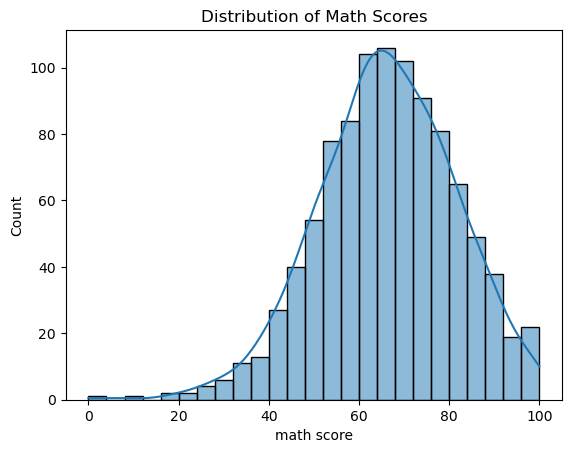

In [3]:
# Check distribution of Math Score
sns.histplot(data['math score'], kde=True)
plt.title('Distribution of Math Scores')
plt.show()

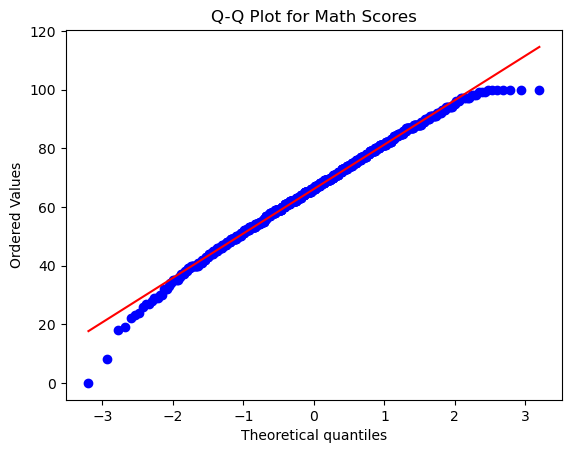

In [4]:
# Q-Q plot
stats.probplot(data['math score'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Math Scores')
plt.show()

In [5]:
# Shapiro-Wilk test
shapiro_math = stats.shapiro(data['math score'])
print(f'Shapiro-Wilk Test for Math Scores: Statistic={shapiro_math.statistic}, p-value={shapiro_math.pvalue}')

Shapiro-Wilk Test for Math Scores: Statistic=0.9931513872437832, p-value=0.00014545719606603633


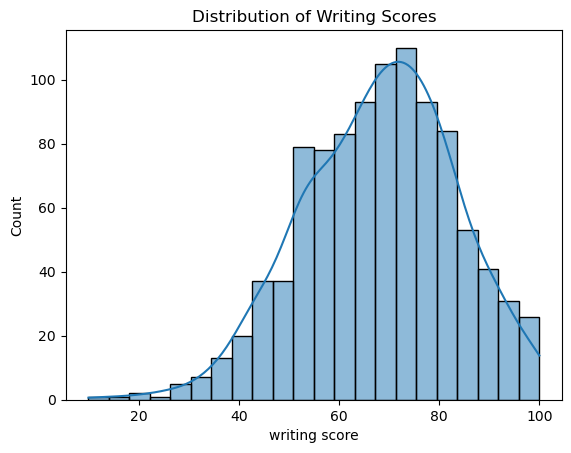

In [6]:
# Check distribution of Writing Score
sns.histplot(data['writing score'], kde=True)
plt.title('Distribution of Writing Scores')
plt.show()

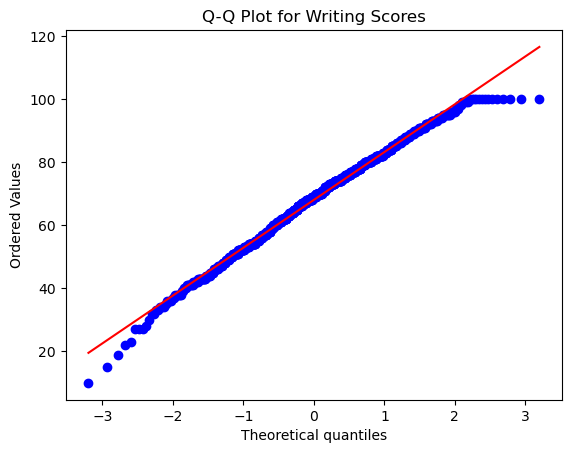

In [7]:
# Q-Q plot
stats.probplot(data['writing score'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Writing Scores')
plt.show()

In [8]:
# Shapiro-Wilk test
shapiro_writing = stats.shapiro(data['writing score'])
print(f'Shapiro-Wilk Test for Writing Scores: Statistic={shapiro_writing.statistic}, p-value={shapiro_writing.pvalue}')

Shapiro-Wilk Test for Writing Scores: Statistic=0.991964462962203, p-value=2.9215498810124692e-05


In [9]:
# Split the data into two groups based on test preparation course
group_completed = data[data['test preparation course'] == 'completed']['math score']
group_none = data[data['test preparation course'] == 'none']['math score']

In [10]:
# Check normality and decide on the test
if shapiro_math.pvalue > 0.05:
    # Independent Two-Sample t-test
    t_stat, p_value = stats.ttest_ind(group_completed, group_none)
    print(f'T-test: t-statistic={t_stat}, p-value={p_value}')
else:
    # Mann-Whitney U Test
    u_stat, p_value = stats.mannwhitneyu(group_completed, group_none)
    print(f'Mann-Whitney U Test: U-statistic={u_stat}, p-value={p_value}')

Mann-Whitney U Test: U-statistic=138412.0, p-value=8.015174030469548e-08


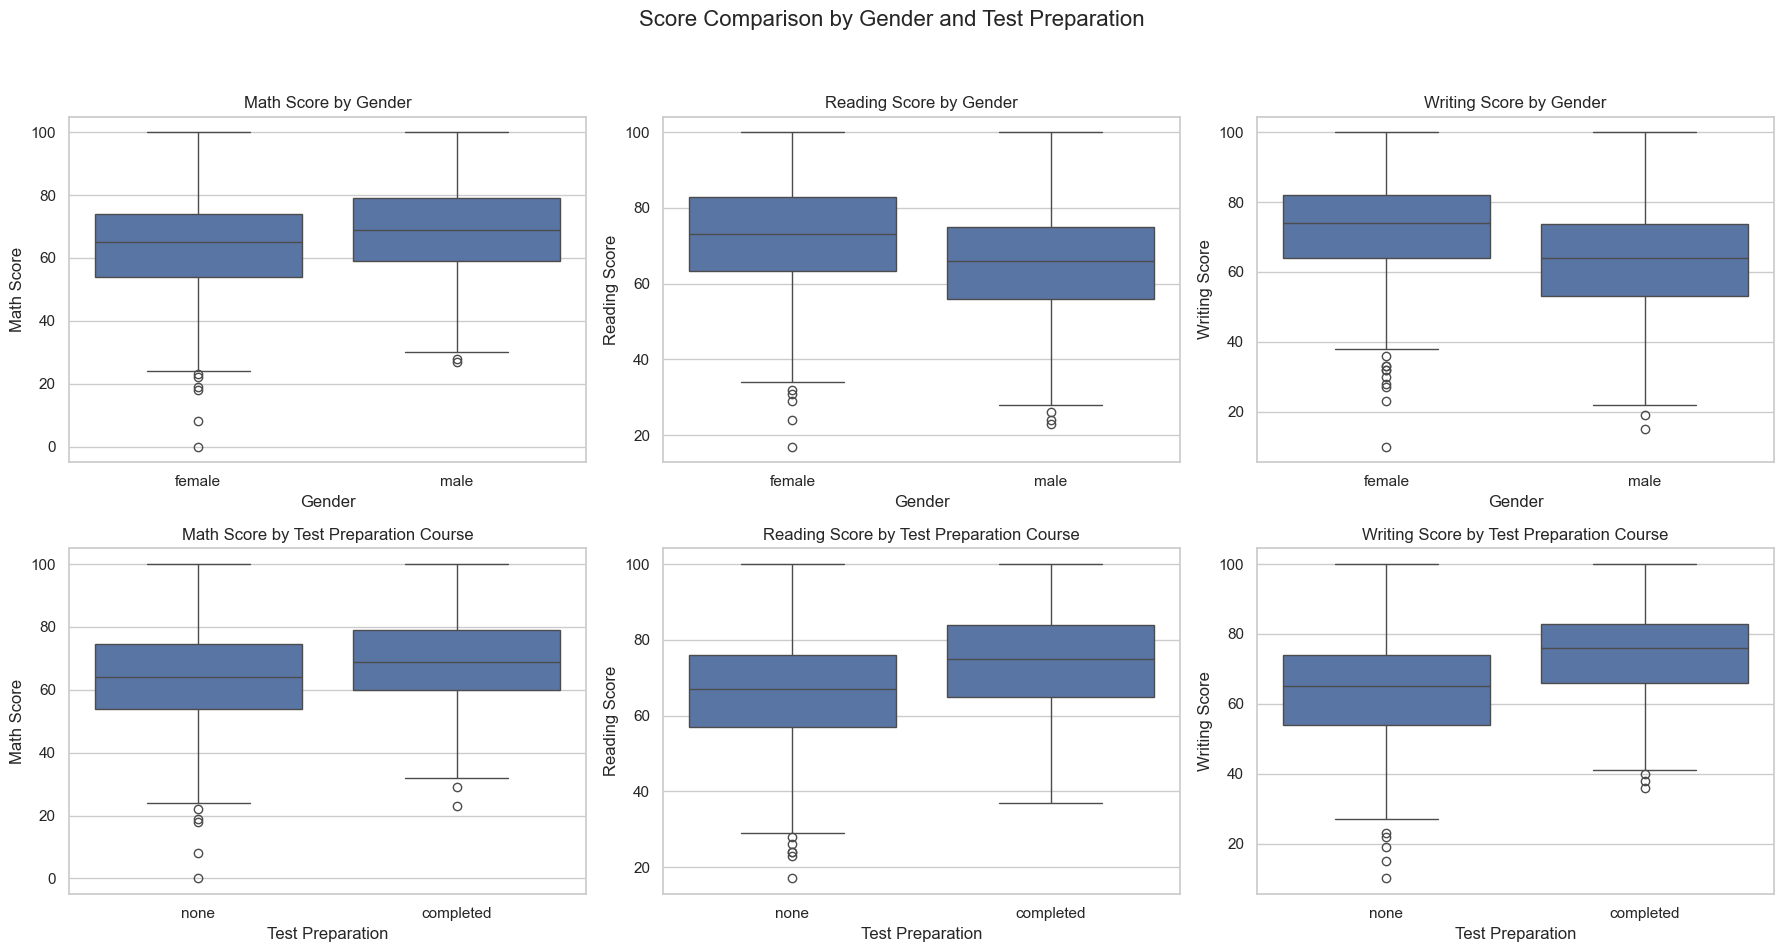

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

subjects = ['math score', 'reading score', 'writing score']

# Set up the figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Score Comparison by Gender and Test Preparation', fontsize=16)

# Row 1: Scores by Gender
for i, subject in enumerate(subjects):
    sns.boxplot(x='gender', y=subject, data=data, ax=axes[0, i])
    axes[0, i].set_title(f'{subject.title()} by Gender')
    axes[0, i].set_xlabel('Gender')
    axes[0, i].set_ylabel(subject.title())

# Row 2: Scores by Test Preparation Course
for i, subject in enumerate(subjects):
    sns.boxplot(x='test preparation course', y=subject, data=data, ax=axes[1, i])
    axes[1, i].set_title(f'{subject.title()} by Test Preparation Course')
    axes[1, i].set_xlabel('Test Preparation')
    axes[1, i].set_ylabel(subject.title())

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
